In [45]:
# ============================================
# IMPORTS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)
pd.set_option('display.max_colwidth', None)

# Configuration des graphiques
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("="*80)
print(" ENVIRONNEMENT CONFIGURÉ")
print("="*80)
print(f" Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)

 ENVIRONNEMENT CONFIGURÉ
 Date: 2025-12-15 15:47:54


In [46]:
# ============================================
# CHARGEMENT DES DONNÉES
# ============================================

def load_and_explore_data(filepath='../data/annotated/podcasts_annotated.csv'):
    """
    Charge et affiche les statistiques du dataset annoté
    """
    print("\n" + "="*80)
    print(" CHARGEMENT DES DONNÉES")
    print("="*80)
    
    df = pd.read_csv(filepath)
    
    print(f"\n Dataset: {filepath}")
    print(f"   • Exemples: {len(df):,}")
    print(f"   • Colonnes: {list(df.columns)}")
    
    # Créer keywords_text si nécessaire
    if 'keywords_text' not in df.columns:
        if 'keywords_clean' in df.columns:
            df['keywords_text'] = df['keywords_clean'].apply(
                lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x)
            )
            print("   • Colonne 'keywords_text' créée")
    
    return df

df = load_and_explore_data()


 CHARGEMENT DES DONNÉES

 Dataset: ../data/annotated/podcasts_annotated.csv
   • Exemples: 419
   • Colonnes: ['id', 'title', 'keywords', 'n_keywords', 'keywords_clean', 'is_kid_friendly']
   • Colonne 'keywords_text' créée



 DISTRIBUTION DES CLASSES
   • Non Kid-Friendly (0): 307 (73.27%)
   • Kid-Friendly (1): 112 (26.73%)

  Ratio de déséquilibre: 0.365


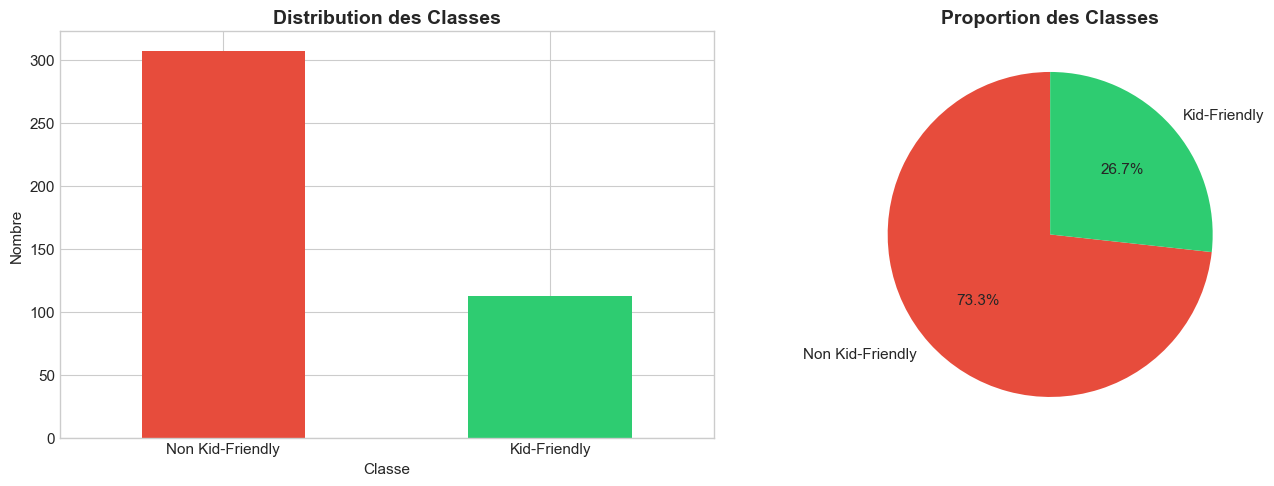

In [47]:
# ============================================
# ANALYSE DE LA DISTRIBUTION DES CLASSES
# ============================================

print("\n" + "="*80)
print(" DISTRIBUTION DES CLASSES")
print("="*80)

target_dist = df['is_kid_friendly'].value_counts()

for label, count in target_dist.items():
    pct = count / len(df) * 100
    label_name = "Kid-Friendly" if label == 1 else "Non Kid-Friendly"
    print(f"   • {label_name} ({label}): {count:,} ({pct:.2f}%)")

class_ratio = target_dist.min() / target_dist.max()
print(f"\n  Ratio de déséquilibre: {class_ratio:.3f}")
if class_ratio < 0.3:
    print(f"   ⚠ Dataset déséquilibré → Recommandation: class_weight='balanced'")

# Visualisation
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_dist.plot(kind='bar', ax=ax[0], color=['#e74c3c', '#2ecc71'])
ax[0].set_title('Distribution des Classes', fontweight='bold', fontsize=14)
ax[0].set_xlabel('Classe')
ax[0].set_ylabel('Nombre')
ax[0].set_xticklabels(['Non Kid-Friendly', 'Kid-Friendly'], rotation=0)

# Pie chart
ax[1].pie(target_dist, labels=['Non Kid-Friendly', 'Kid-Friendly'], 
          autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'], startangle=90)
ax[1].set_title('Proportion des Classes', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()


 STATISTIQUES TEXTUELLES

 Mots par exemple:
   • Moyenne: 20.1
   • Écart-type: 7.7
   • Min/Max: 0 / 65

 Caractères par exemple:
   • Moyenne: 160
   • Min/Max: 0 / 542


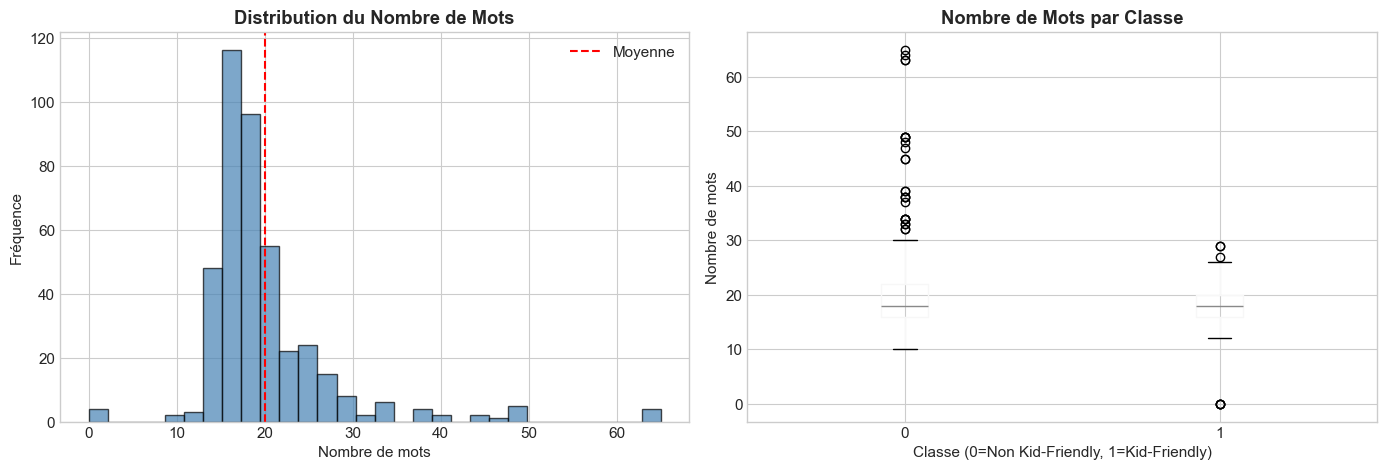

In [48]:
# ============================================
# STATISTIQUES TEXTUELLES
# ============================================

df['n_chars'] = df['keywords_text'].str.len()
df['n_words'] = df['keywords_text'].str.split().str.len()

print("\n" + "="*80)
print(" STATISTIQUES TEXTUELLES")
print("="*80)
print(f"\n Mots par exemple:")
print(f"   • Moyenne: {df['n_words'].mean():.1f}")
print(f"   • Écart-type: {df['n_words'].std():.1f}")
print(f"   • Min/Max: {df['n_words'].min()} / {df['n_words'].max()}")
print(f"\n Caractères par exemple:")
print(f"   • Moyenne: {df['n_chars'].mean():.0f}")
print(f"   • Min/Max: {df['n_chars'].min()} / {df['n_chars'].max()}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution du nombre de mots
axes[0].hist(df['n_words'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution du Nombre de Mots', fontweight='bold')
axes[0].set_xlabel('Nombre de mots')
axes[0].set_ylabel('Fréquence')
axes[0].axvline(df['n_words'].mean(), color='red', linestyle='--', label='Moyenne')
axes[0].legend()

# Comparaison par classe
df.boxplot(column='n_words', by='is_kid_friendly', ax=axes[1])
axes[1].set_title('Nombre de Mots par Classe', fontweight='bold')
axes[1].set_xlabel('Classe (0=Non Kid-Friendly, 1=Kid-Friendly)')
axes[1].set_ylabel('Nombre de mots')
plt.suptitle('')  # Supprimer le titre automatique

plt.tight_layout()
plt.show()

In [49]:
# ============================================
# EXEMPLES ALÉATOIRES
# ============================================

print("\n" + "="*80)
print(" EXEMPLES ALÉATOIRES DU DATASET")
print("="*80)

for idx, row in df.sample(5, random_state=42).iterrows():
    label = "✓ Kid-Friendly" if row['is_kid_friendly'] == 1 else "✗ Non Kid-Friendly"
    keywords = row['keywords_text'][:100] + "..." if len(row['keywords_text']) > 100 else row['keywords_text']
    print(f"\n{label}")
    print(f"Keywords: {keywords}")
    print(f"Mots: {row['n_words']}")


 EXEMPLES ALÉATOIRES DU DATASET

✗ Non Kid-Friendly
Keywords: mars exploration ancient technology historical anomalies lost civilization theories archeological se...
Mots: 16

✗ Non Kid-Friendly
Keywords: child abuse exoneration fathers rights group false allegation damage custody battle closure legal sy...
Mots: 20

✗ Non Kid-Friendly
Keywords: addiction sobriety spiritual awakening conspiracy theories media censorship political commentary yog...
Mots: 19

✗ Non Kid-Friendly
Keywords: trauma surgery emergency medicine life and death decisions stressful job surgeon life medical ethics...
Mots: 16

✓ Kid-Friendly
Keywords: john oliver last week tonight political satire late night comedy journalistic comedy news analysis c...
Mots: 16


In [50]:
# ============================================
# SAUVEGARDE DES DONNÉES PRÉPARÉES
# ============================================

print("\n" + "="*80)
print(" RÉSUMÉ")
print("="*80)
print(f"\n Dataset prêt pour la modélisation:")
print(f"   • Exemples: {len(df):,}")
print(f"   • Features: keywords_text")
print(f"   • Target: is_kid_friendly")
print(f"   • Classes: {df['is_kid_friendly'].nunique()}")
print("\n Prochaine étape: 02_baseline_models.ipynb")
print("="*80)


 RÉSUMÉ

 Dataset prêt pour la modélisation:
   • Exemples: 419
   • Features: keywords_text
   • Target: is_kid_friendly
   • Classes: 2

 Prochaine étape: 02_baseline_models.ipynb


In [ ]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import (
    IsSingleValue, MixedNulls, MixedDataTypes, DataDuplicates
)

# Create dataset WITHOUT label for data integrity checks
dc_dataset = Dataset(
    df[['keywords_text']],  # only features, no label
    label=None,             # no label
    cat_features=[]
)

checks = [
    ("Valeurs constantes", IsSingleValue()),
    ("Valeurs manquantes", MixedNulls()),
    ("Types mixtes", MixedDataTypes()),
    ("Duplicates", DataDuplicates())
]

for name, check in checks:
    print(f"\n→ Vérification: {name}...")
    try:
        result = check.run(dc_dataset)
        if result.passed():
            print(f"   ✓ {name} passés")
        else:
            print(f"   ⚠ {name} échoués")
    except Exception as e:
        print(f"   ✗ Erreur: {str(e)[:80]}")


ValueError: 'max_error' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.